# Exploratory Data Analysis on Tokyo Airbnb

## Abstract

## Data Source

## Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', 1000)   

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("Data Files/tokyo_airbnb_listing_2024.csv")

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20241230011552,2024-12-30,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,"Tokyo, Japan",Would love to travel all over the world and me...,within a day,100%,93%,t,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1.0,2.0,"['email', 'phone']",t,t,NaN,Sumida Ku,NaN,35.71707,139.82608,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Hangers"", ""Heating"", ""Self check-in"", ""Carbo...","$13,000.00",3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,28,58,88,156,2024-12-30,183,9,1,2011-09-21,2024-12-12,4.78,4.75,4.91,4.85,4.84,4.56,4.80,M130003350,f,1,1,0,0,1.13
1,776070,https://www.airbnb.com/rooms/776070,20241230011552,2024-12-30,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Thank you for looking at our profile.\nI am Ke...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/ba6d4...,https://a0.muscache.com/im/pictures/user/ba6d4...,Kita District,1.0,6.0,"['email', 'phone']",t,t,"Kita-ku, Tokyo Prefecture, Japan",Kita Ku,NaN,35.73844,139.76917,Private room in home,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Hangers"", ""Heating"", ""Bed linens"", ""Shampoo""...","$9,474.00",3,14,3.0,3.0,14.0,14.0,3.0,14.0,NaN,t,9,24,50,209,2024-12-30,264,15,1,2012-11-28,2024-12-01,4.98,4.97,4.92,4.98,4.98,4.84,4.92,M130000243,f,1,0,1,0,1.79
2,905944,https://www.airbnb.com/rooms/905944,20241230011552,2024-12-30,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,"Tokyo, Japan",A host backed up by a team of professional cle...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/4847803/profi...,https://a0.muscache.com/im/users/4847803/profi...,Shibuya District,9.0,18.0,"['email', 'phone']",t,f,"Shibuya, Tokyo Prefecture, Japan",Shibuya Ku,NaN,35.67878,139.67847,Entire rental unit,Entire home/apt,6,1.5,1.5 baths,2.0,4.0,"[""Paid parking off premises"", ""Coffee maker"", ...","$39,363.00",5,1125,1.0,10.0,365.0,1125.0,4.7,861.3,NaN,t,0,13,32,273,2024-12-30,242,42,2,2013-04-07,2024-12-15,4.80,4.81,4.79,4.87,4.91,4.78,4.78,Hotels and Inns Business Act 

In [4]:
df.shape

(21058, 75)

In [5]:
columns = df.columns.to_list()
print(columns)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [6]:
print(pd.DataFrame(df.dtypes, columns=['Data Type']))


                                             Data Type
id                                               int64
listing_url                                     object
scrape_id                                        int64
last_scraped                                    object
source                                          object
name                                            object
description                                     object
neighborhood_overview                           object
picture_url                                     object
host_id                                          int64
host_url                                        object
host_name                                       object
host_since                                      object
host_location                                   object
host_about                                      object
host_response_time                              object
host_response_rate                              object
host_accep

## Wrangling and Cleaning Data

Drop columns that are irrelevant or insignificant to our data analysis.

In [7]:
columns_to_drop = ['id', 
                   'listing_url', 
                   'scrape_id', 
                   'last_scraped', 
                   'source', 
                   'name', 
                   'description', 
                   'neighborhood_overview', 
                   'picture_url', 
                   'host_url', 
                   'host_name', 
                   'host_location', 
                   'host_neighbourhood',
                   'host_about', 
                   'host_thumbnail_url', 
                   'host_picture_url', 
                   'host_verifications', 
                   'host_has_profile_pic',
                   'host_identity_verified', 
                   'neighbourhood',
                   'minimum_nights',
                   'maximum_nights',
                   'minimum_minimum_nights',
                   'maximum_minimum_nights',
                   'minimum_maximum_nights',
                   'maximum_maximum_nights',
                   'minimum_nights_avg_ntm', 
                   'maximum_nights_avg_ntm',
                   'calendar_updated',
                   'calendar_last_scraped',
                   'license'
                   ]

df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,964081,2011-08-13,within a day,100%,93%,t,1.0,2.0,Sumida Ku,NaN,35.71707,139.82608,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Hangers"", ""Heating"", ""Self check-in"", ""Carbo...","$13,000.00",t,28,58,88,156,183,9,1,2011-09-21,2024-12-12,4.78,4.75,4.91,4.85,4.84,4.56,4.80,f,1,1,0,0,1.13
1,801494,2011-07-10,within an hour,100%,100%,t,1.0,6.0,Kita Ku,NaN,35.73844,139.76917,Private room in home,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Hangers"", ""Heating"", ""Bed linens"", ""Shampoo""...","$9,474.00",t,9,24,50,209,264,15,1,2012-11-28,2024-12-01,4.98,4.97,4.92,4.98,4.98,4.84,4.92,f,1,0,1,0,1.79
2,4847803,2013-01-25,within an hour,100%,100%,t,9.0,18.0,Shibuya Ku,NaN,35.67878,139.67847,Entire rental unit,Entire home/apt,6,1.5,1.5 baths,2.0,4.0,"[""Paid parking off premises"", ""Coffee maker"", ...","$39,363.00",t,0,13,32,273,242,42,2,2013-04-07,2024-12-15,4.80,4.81,4.79,4.87,4.91,4.78,4.78,t,8,8,0,0,1.69
3,5596383,2013-03-24,within a few hours,100%,100%,t,1.0,6.0,Setagaya Ku,NaN,35.65800,139.67134,Private room in home,Private room,2,1.0,1 shared bath,1.0,2.0,"[""Baking sheet"", ""Portable fans"", ""Coffee make...","$26,571.00",t,27,46,46,46,271,11,1,2013-04-06,2024-12-10,4.95,4.94,4.84,4.94,4.98,4.92,4.90,f,1,0,1,0,1.90
4,5686404,2013-03-30,within an hour,100%,92%,t,1.0,2.0,Adachi Ku,NaN,35.74363,139.79852,Private room in home,Private room,3,1.5,1.5 baths,1.0,0.0,"[""Hangers"", ""Heating"", ""Exterior or entryway s...","$10,571.00",t,9,39,69,69,135,26,2,2013-08-10,2024-12-19,4.80,4.89,4.79,4.94,4.92,4.74,4.82,f,1,0,1,0,0.97


In [8]:
df.shape

(21058, 44)

In [9]:
print(pd.DataFrame(df.dtypes, columns=['Data Type']))

                                             Data Type
host_id                                          int64
host_since                                      object
host_response_time                              object
host_response_rate                              object
host_acceptance_rate                            object
host_is_superhost                               object
host_listings_count                            float64
host_total_listings_count                      float64
neighbourhood_cleansed                          object
neighbourhood_group_cleansed                   float64
latitude                                       float64
longitude                                      float64
property_type                                   object
room_type                                       object
accommodates                                     int64
bathrooms                                      float64
bathrooms_text                                  object
bedrooms  

Convert objects (strings), `host_since`, `first_review`, `last_review` that should be Datetime for time-based analysis

In [10]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

Convert `price` to Numeric

In [11]:
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)

Convert `host_response_rate`, `host_acceptance_rate` to Numetic

In [12]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

Convert `instant_bookable`, `has_availability`, `host_is_superhost` to Boolean

In [13]:
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})

# Ensure 'has_availability' is properly converted to boolean
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})
df['has_availability'] = df['has_availability'].fillna(True)  # Fill missing values

# Ensure 'host_is_superhost' is properly converted to boolean
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})
df['host_is_superhost'] = df['host_is_superhost'].fillna(False)  # Fill missing values

# Explicitly cast both columns to boolean AFTER filling NaNs
df = df.astype({'has_availability': bool, 'host_is_superhost': bool})


/var/folders/2g/gw5vkbcn6dnd3rkyl2n3443h0000gn/T/ipykernel_6269/2393026860.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].fillna(True)  # Fill missing values
/var/folders/2g/gw5vkbcn6dnd3rkyl2n3443h0000gn/T/ipykernel_6269/2393026860.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_is_superhost'] = df['host_is_superhost'].fillna(False)  # Fill missing values


In [14]:
df['host_is_superhost'].value_counts()

host_is_superhost
False    12894
True      8164
Name: count, dtype: int64

In [15]:
df['has_availability'].value_counts()

has_availability
True     21046
False       12
Name: count, dtype: int64

Check and Handle `Null` or Missing Data

In [16]:
df.isnull().sum()

host_id                                             0
host_since                                          4
host_response_time                                480
host_response_rate                                480
host_acceptance_rate                              351
host_is_superhost                                   0
host_listings_count                                 4
host_total_listings_count                           4
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    21058
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                        2227
bathrooms_text                                     46
bedrooms                                          264
beds                        

In [17]:
# Use first_review as proxy
df['host_since'] = df['host_since'].fillna(df['first_review'])

In [18]:
# Fill with "Unknown" for missing host_response_time
df['host_response_time'] = df['host_response_time'].fillna('Unknown')

In [19]:
# Fill host_response_rate and host_acceptance_rate with median
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

In [20]:
# Fill host_listings_count and host_total_listing_count with median
df['host_listings_count'] = df['host_listings_count'].fillna(df['host_listings_count'].median())
df['host_total_listings_count'] = df['host_total_listings_count'].fillna(df['host_total_listings_count'].median())

In [21]:
# Fill number of bathrooms with the extract of bathrooms_text, only if the bathroom_text is not NaN
df['bathrooms_extracted'] = df['bathrooms_text'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
df.loc[df['bathrooms'].isna() & df['bathrooms_extracted'].notna(), 'bathrooms'] = df['bathrooms_extracted']
df.drop(columns=['bathrooms_extracted'], inplace=True)

In [22]:
# Change the bathroom text to only reflect the bathroom type
df['bathrooms_text'] = df['bathrooms_text'].str.replace(r'^\d+\.?\d*\s*', '', regex=True)

In [23]:
# Fill the missing bathrooms_text with the mode of the room_type
overall_mode = df['bathrooms_text'].mode()[0]
df['bathrooms_text'] = df.groupby('room_type')['bathrooms_text'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else overall_mode))

In [24]:
# Fill number of bathrooms, bedrooms with the median of the room_type
# Fill number of beds with the median of the number of bedrooms
df['bathrooms'] = df['bathrooms'].fillna(df.groupby('room_type')['bathrooms'].transform('median'))
df['bedrooms'] = df['bedrooms'].fillna(df.groupby('room_type')['bedrooms'].transform('median'))
df['beds'] = df['beds'].fillna(df.groupby('bedrooms')['beds'].transform('median'))

In [25]:
# Remove the $ sign and change to type float for the price of listing
# Fill in missing price of listing with the median price for listing in the neighbourhood
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)
df['price'] = df['price'].fillna(df.groupby('neighbourhood_cleansed')['price'].transform('median'))

In [26]:
df.isnull().sum()

host_id                                             0
host_since                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    21058
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bathrooms_text                                      0
bedrooms                                            0
beds                        

In [27]:
df['first_review'] = df['first_review'].fillna('No Reviews')
df['last_review'] = df['last_review'].fillna('No Reviews')

review_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df[review_cols] = df[review_cols].fillna(df[review_cols].mean())

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [28]:
df.isnull().sum()

host_id                                             0
host_since                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    21058
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bathrooms_text                                      0
bedrooms                                            0
beds                        

In [29]:
df['neighbourhood_cleansed'].unique().tolist()

['Sumida Ku',
 'Kita Ku',
 'Shibuya Ku',
 'Setagaya Ku',
 'Adachi Ku',
 'Meguro Ku',
 'Shinjuku Ku',
 'Nakano Ku',
 'Koto Ku',
 'Bunkyo Ku',
 'Katsushika Ku',
 'Nerima Ku',
 'Suginami Ku',
 'Toshima Ku',
 'Ota Ku',
 'Shinagawa Ku',
 'Higashimurayama Shi',
 'Machida Shi',
 'Taito Ku',
 'Akishima Shi',
 'Itabashi Ku',
 'Edogawa Ku',
 'Arakawa Ku',
 'Kodaira Shi',
 'Minato Ku',
 'Kokubunji Shi',
 'Hino Shi',
 'Mitaka Shi',
 'Fuchu Shi',
 'Hachioji Shi',
 'Chuo Ku',
 'Tama Shi',
 'Chiyoda Ku',
 'Komae Shi',
 'Chofu Shi',
 'Akiruno Shi',
 'Koganei Shi',
 'Nishitokyo Shi',
 'Fussa Shi',
 'Kunitachi Shi',
 'Ome Shi',
 'Hamura Shi',
 'Tachikawa Shi',
 'Higashiyamato Shi',
 'Musashimurayama Shi',
 'Musashino Shi',
 'Okutama Machi',
 'Hinohara Mura',
 'Kiyose Shi']

In [30]:
# Define neighborhood groups
neighbourhood_groups = {
    'Central Tokyo': [
        'Chiyoda Ku', 'Chuo Ku', 'Minato Ku', 'Shinjuku Ku', 'Shibuya Ku', 'Bunkyo Ku', 'Taito Ku'
    ],
    'Residential Tokyo': [
        'Setagaya Ku', 'Nakano Ku', 'Meguro Ku', 'Suginami Ku', 'Toshima Ku', 'Kita Ku', 'Arakawa Ku'
    ],
    'Outer Residential Tokyo': [
        'Sumida Ku', 'Katsushika Ku', 'Edogawa Ku', 'Koto Ku', 'Itabashi Ku', 'Nerima Ku', 'Ota Ku', 'Shinagawa Ku'
    ],
    'Greater Tokyo': [
        'Machida Shi', 'Mitaka Shi', 'Fuchu Shi', 'Chofu Shi', 'Hino Shi', 'Tama Shi',
        'Higashimurayama Shi', 'Akishima Shi', 'Kokubunji Shi', 'Kodaira Shi', 'Komae Shi',
        'Koganei Shi', 'Hachioji Shi', 'Nishitokyo Shi', 'Fussa Shi', 'Kunitachi Shi',
        'Ome Shi', 'Hamura Shi', 'Tachikawa Shi', 'Higashiyamato Shi', 'Musashimurayama Shi', 
        'Musashino Shi'
    ],
    'Western Tokyo': [
        'Akiruno Shi', 'Okutama Machi', 'Hinohara Mura'
    ]
}

# Function to map neighborhoods to groups
def map_neighbourhood_group(neighbourhood):
    for group, areas in neighbourhood_groups.items():
        if neighbourhood in areas:
            return group
    return 'Other'  # Fallback for unknown areas

# Apply the function to create a new column
df['neighbourhood_group_cleansed'] = df['neighbourhood_cleansed'].apply(map_neighbourhood_group)

In [31]:
df = df.rename(columns={'bathrooms_text': 'bathroom_type', 'price': 'listing_price', 'neighbourhood_cleansed' : 'neighbourhood', 'neighbourhood_group_cleansed' : 'neighbourhood_group'})

In [32]:
df.isnull().sum()

host_id                                         0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood                                   0
neighbourhood_group                             0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathroom_type                                   0
bedrooms                                        0
beds                                            3
amenities                                       0


In [33]:
print(pd.DataFrame(df.dtypes, columns=['Data Type']))

                                                   Data Type
host_id                                                int64
host_since                                    datetime64[ns]
host_response_time                                    object
host_response_rate                                   float64
host_acceptance_rate                                 float64
host_is_superhost                                       bool
host_listings_count                                  float64
host_total_listings_count                            float64
neighbourhood                                         object
neighbourhood_group                                   object
latitude                                             float64
longitude                                            float64
property_type                                         object
room_type                                             object
accommodates                                           int64
bathrooms               

## Exploring, Visualising and Extracting Insights

### Number of Listing Per Neighbourhood

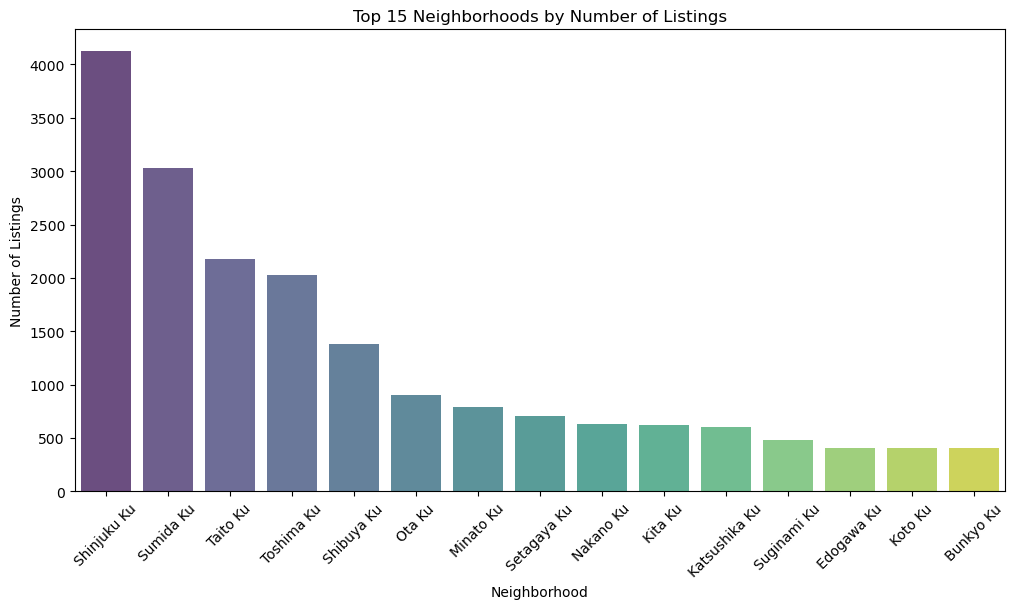

In [34]:
top_neighborhoods = df['neighbourhood'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, 
            y=top_neighborhoods.values,
            hue=top_neighborhoods.index,
            palette="viridis",
            legend=False,
            alpha=0.8)

plt.title("Top 15 Neighborhoods by Number of Listings")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


 #### insights: Top 15 Tokyo Neighbourhoods with the Most Lisitings
 
 1. Shinjuku is the most competitive Airbnb market in Tokyo, meaning pricing, reviews, and availability will play a key role in standing out. Shinjuku is Tokyo’s busiest district, home to Shinjuku Station. It’s a major business, entertainment, and nightlife hub (Kabukicho, Golden Gai). High tourist demand makes it the top choice for short-term rentals.
 2. Sumida Ku and Taito Ku have the 2nd and 3rd highest listings. These areas are known for traditional Tokyo experiences—Asakusa, Senso-ji Temple, and Tokyo Skytree. They offer cheaper accommodation compared to central areas like Shinjuku & Shibuya. These areas cater to budget travelers & culture seekers.
 3. Toshima Ku (2,031 listings) and Shibuya Ku (1,386 listings) attract a younger crowd. Toshima (Ikebukuro) has large shopping & entertainment hubs. Shibuya is a global fashion & nightlife hotspot (Shibuya Crossing, Harajuku, Omotesando.)Travelers here likely prefer modern apartments with Instagrammable aesthetics, easy transport access, and nightlife proximity.

### Distribution of Listing Prices

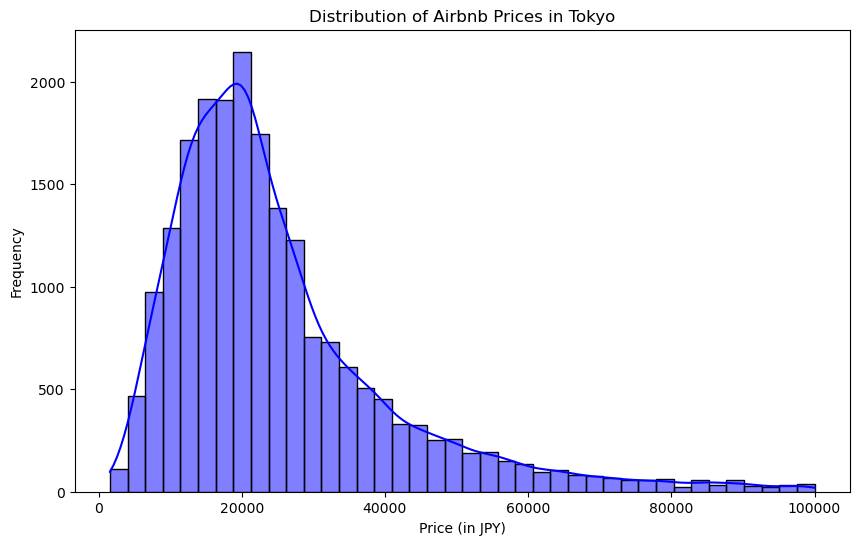

In [56]:
listing_prices_less_100000 = df[df['listing_price'] < 100000]['listing_price']

plt.figure(figsize=(10, 6))
sns.histplot(listing_prices_less_100000, bins=40, kde=True, color="blue")  # Filter extreme values
plt.title("Distribution of Airbnb Prices in Tokyo")
plt.xlabel("Price (in JPY)")
plt.ylabel("Frequency")
plt.show()

In [55]:
df[df['listing_price'] >= 100000].shape[0]

396

#### Insights: Right-Skewed Price Distribution
1. Majority of Listings Are Affordable. Most Airbnb listings in Tokyo fall within the lower to mid-range price category. The bulk of listings are cheaper, suggesting a highly competitive market in the lower price segment.
2.  Outliers Exist in the High-End Market. The long tail on the right indicates a small number of luxury listings priced significantly higher than the median. These could be luxury penthouses, ryokans (traditional inns), or high-end serviced apartments.
3. A Small number of 396 listings are priced at above 100, 0000 JPY. These are considered outliers in the market. They serve a very niche market of the super rich.

### Price Variation by Neighborhood

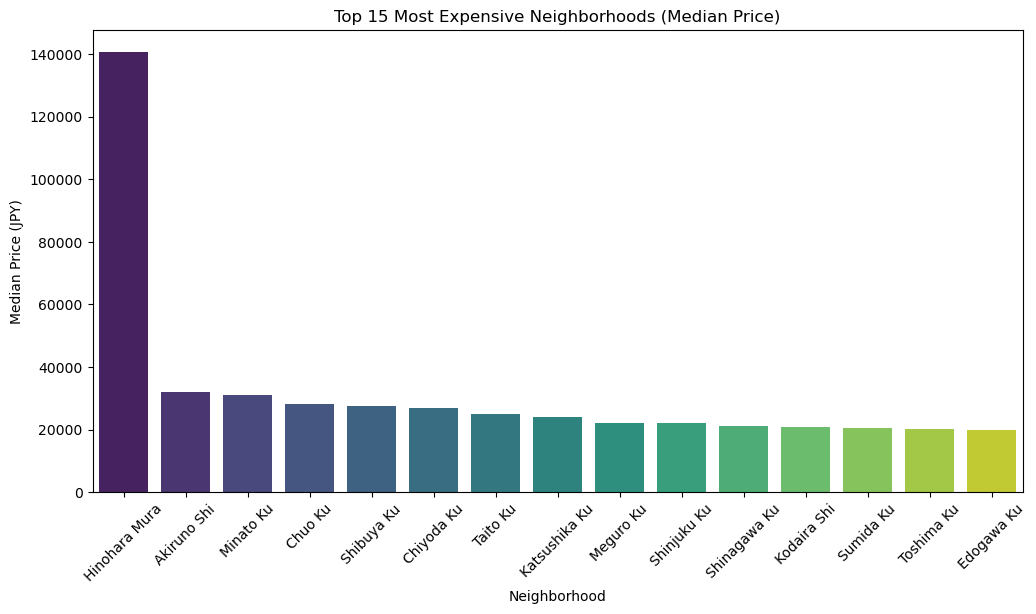

In [63]:
top_15_neighbourhood_median_price = df.groupby('neighbourhood')['listing_price'].median().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_15_neighbourhood_median_price.index, 
    y=top_15_neighbourhood_median_price.values, 
    hue=top_15_neighbourhood_median_price.index, 
    legend=False,
    palette="viridis"
)
plt.title("Top 15 Most Expensive Neighborhoods (Median Price)")
plt.xlabel("Neighborhood")
plt.ylabel("Median Price (JPY)")
plt.xticks(rotation=45)
plt.show()

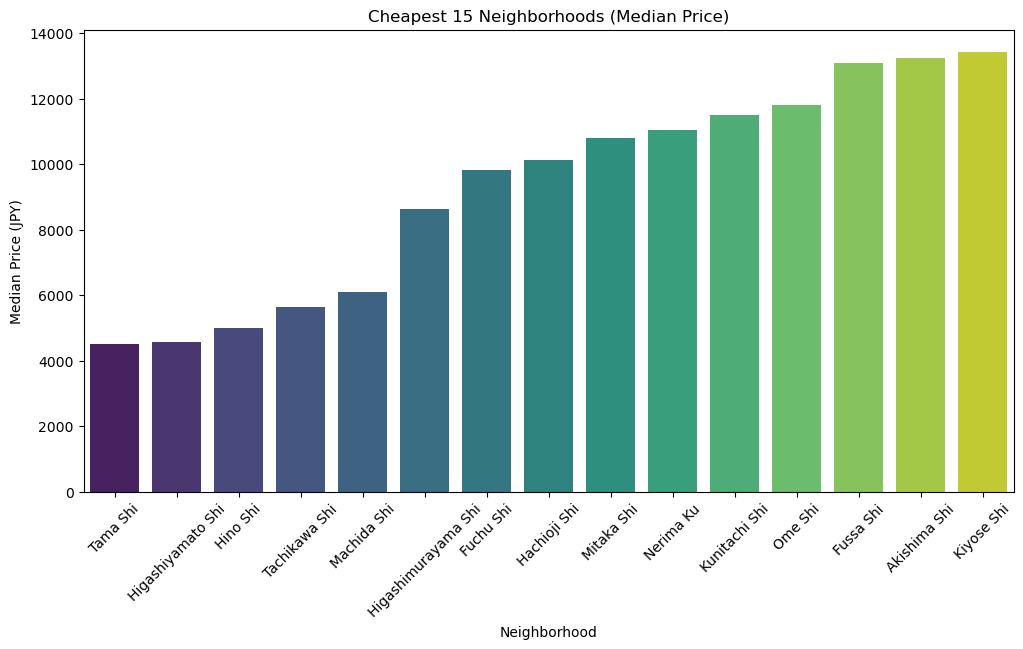

In [65]:
lowest_15_neighbourhood_median_price = df.groupby('neighbourhood')['listing_price'].median().sort_values(ascending=True).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=lowest_15_neighbourhood_median_price.index, 
    y=lowest_15_neighbourhood_median_price.values, 
    hue=lowest_15_neighbourhood_median_price.index, 
    legend=False,
    palette="viridis"
)
plt.title("Cheapest 15 Neighborhoods (Median Price)")
plt.xlabel("Neighborhood")
plt.ylabel("Median Price (JPY)")
plt.xticks(rotation=45)
plt.show()

### Understand Superhost Influence

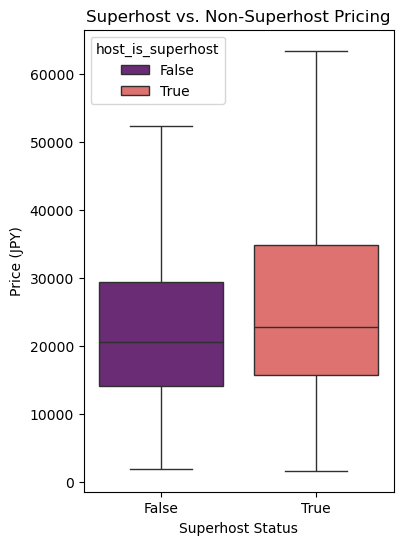

In [76]:
plt.figure(figsize=(4, 6))
sns.boxplot(
    x='host_is_superhost', 
    y='listing_price', 
    data=df, 
    showfliers=False,  # Hide outliers
    hue='host_is_superhost',
    palette="magma"
)
plt.title("Superhost vs. Non-Superhost Pricing")
plt.xlabel("Superhost Status")
plt.ylabel("Price (JPY)")

plt.show()

#### Insights: Superhosts can command higher prices due to trust, reliability, and better reviews.

1. Median price for Superhosts is higher than Non-Superhosts, it suggests that Superhosts offer higher-quality listings (better locations, amenities, experiences). Guests are willing to pay more for a trusted Superhost.
2. Median price for Non-Superhosts is lower and smaller Spread of prices (IQR). More budget-friendly listings are offered by new or less-experienced hosts. Non-Superhosts may compete on price rather than reputation.

### Proportion of Listing managed by Superhost

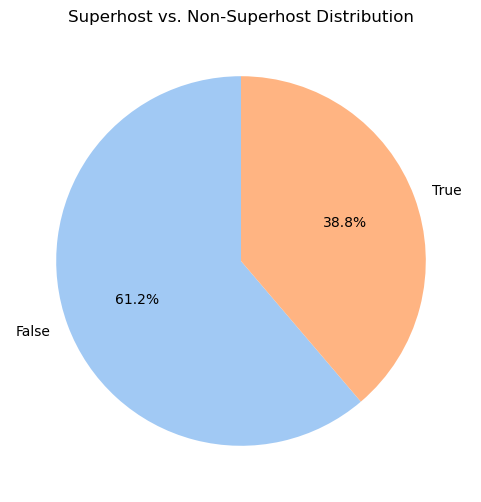

In [80]:
plt.figure(figsize=(6, 6))

df_superhost_counts = df['host_is_superhost'].value_counts()

colors = sns.color_palette("pastel")[:2]
plt.pie(
    df_superhost_counts, 
    labels=df_superhost_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90
)
plt.title("Superhost vs. Non-Superhost Distribution")

plt.show()

### Room Type Distribution

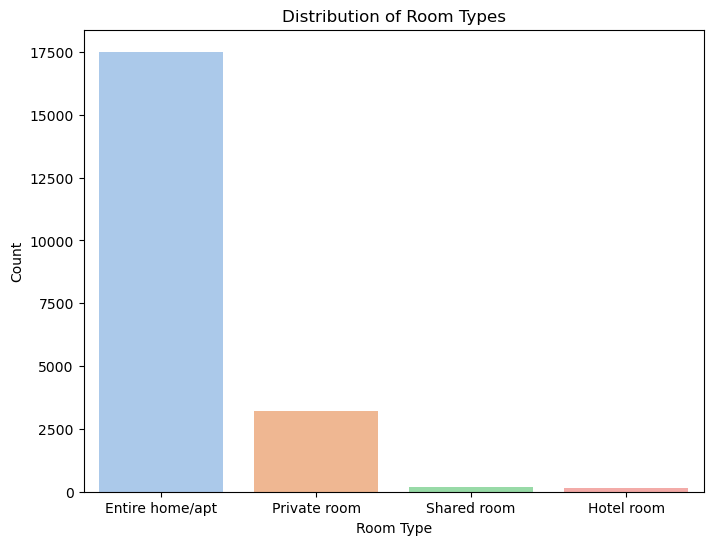

In [81]:
plt.figure(figsize=(8, 6))

sns.barplot(
    x=df['room_type'].value_counts().index, 
    y=df['room_type'].value_counts().values, 
    hue=df['room_type'].value_counts().index, 
    palette="pastel"
)
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.show()

#### Insights:
1. Entire homes/apartments dominate. Tokyo has many full-apartment rentals, as space is limited. Some are dedicated Airbnb properties rather than shared homes.
2. Private rooms are the second most common. Many listings are shared apartments, where hosts rent out extra rooms.
3. Shared rooms and hotel-like listings are less common, but hostels or capsule hotels may appear as "shared rooms."

### Distribution of Review Scores

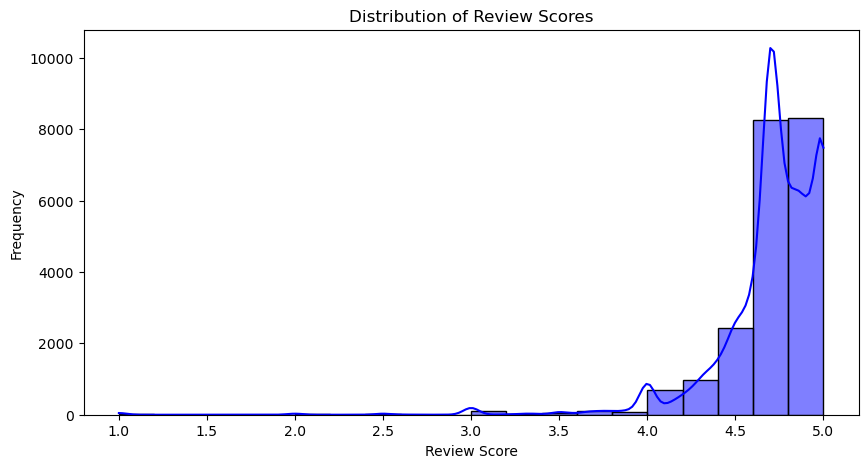

In [83]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,
            x='review_scores_rating',
            bins=20,
            kde=True,
            color="blue")
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

#### Insight
1. A left-skewed distribution means that most listings receive high ratings (near 5.0), with only a few having lower scores.
2. Most Listings Have High Ratings (Near 4.5 - 5.0) Airbnb guests rarely leave very low ratings unless they have a very bad experience. Hosts who consistently receive bad reviews may improve service or remove listings over time. Many hosts are Superhosts, meaning they maintain high service quality.
3.  Cultural hospitality and high service expectations contribute to the abundance of 4.5+ ratings.


### Density of Airbnb listings in Tokyo by Neighbourhood Group

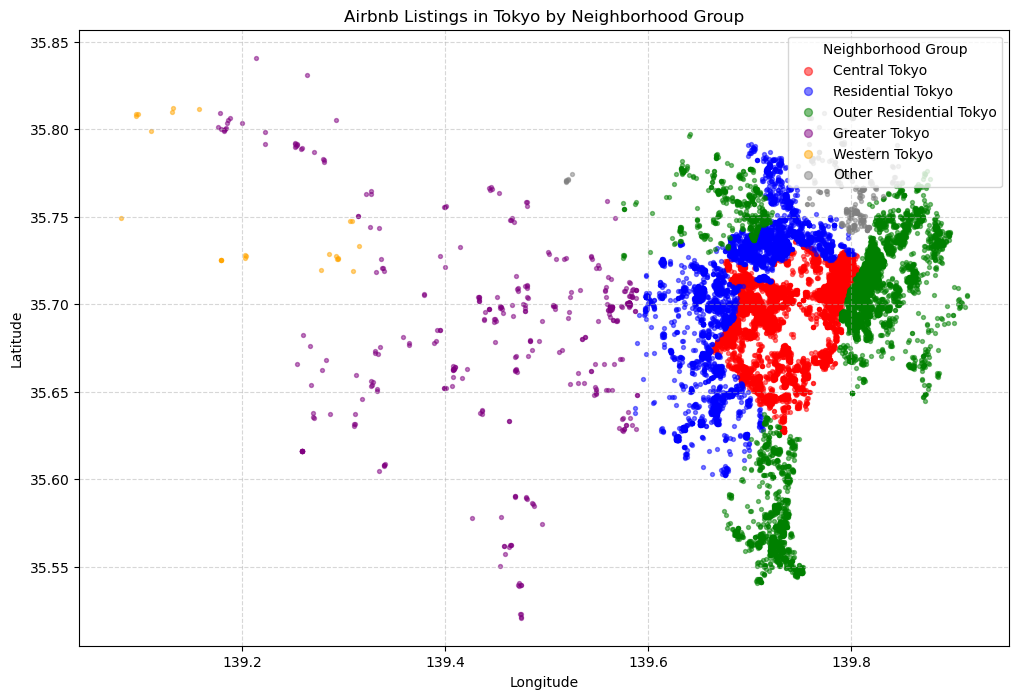

In [37]:
# Define colors for each neighborhood group
group_colors = {
    'Central Tokyo': 'red',
    'Residential Tokyo': 'blue',
    'Outer Residential Tokyo': 'green',
    'Greater Tokyo': 'purple',
    'Western Tokyo': 'orange',
    'Other': 'gray'
}

# Assign colors based on neighborhood group
df['color'] = df['neighbourhood_group'].map(group_colors)

# Plot the scatter plot
plt.figure(figsize=(12, 8))
for group, color in group_colors.items():
    subset = df[df['neighbourhood_group'] == group]
    plt.scatter(subset['longitude'], subset['latitude'], c=color, label=group, alpha=0.5, s=8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Airbnb Listings in Tokyo by Neighborhood Group")
plt.legend(title="Neighborhood Group", loc='upper right', markerscale=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### Insight: How are listing distributed across Tokyo?
- **Central Tokyo (Red):** High density of listings in key districts like Shinjuku, Shibuya, Minato, and Chiyoda.
- **Residential Tokyo (Blue):** Spread across Nakano, Meguro, and Suginami, showing strong local housing areas.
- **Outer Residential Tokyo (Green):** Covers Edogawa, Nerima, and Sumida, which are more affordable alternatives.
- **Greater Tokyo (Purple):** Listings expand into Mitaka, Chofu, and Hachioji, showing suburban demand.
- **Western Tokyo (Orange):** Few listings in Okutama and Hinohara, which are more rural.

### How experienced are Airbnb hosts in Tokyo?

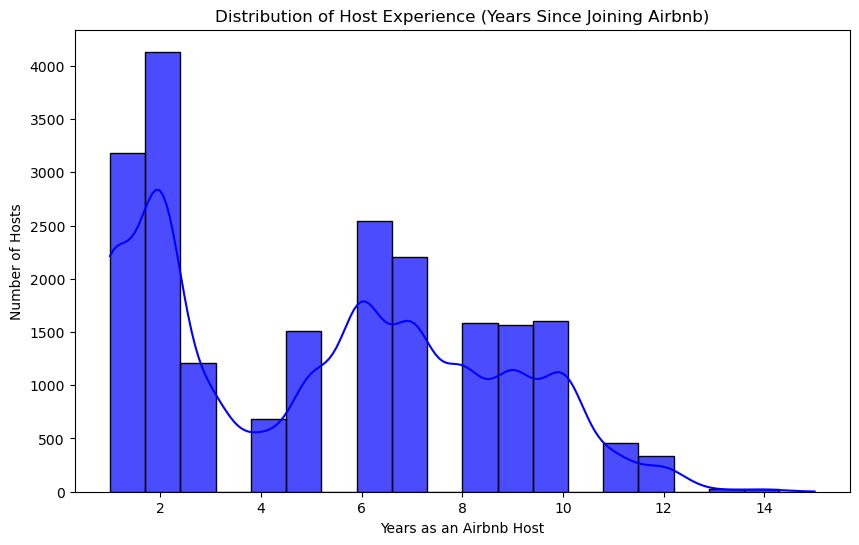

In [88]:
# Compute host tenure (Years as an Airbnb host)
df['host_tenure'] = 2025 - df['host_since'].dt.year

# Plot distribution of host tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['host_tenure'],
            bins=20,
            kde=True,
            color='blue',
            alpha=0.7)
plt.title("Distribution of Host Experience (Years Since Joining Airbnb)")
plt.xlabel("Years as an Airbnb Host")
plt.ylabel("Number of Hosts")
plt.show()

#### Insights
1. Most Hosts Are Relatively New. The majority of hosts have joined Airbnb within the last 3-5 years. This suggests that many new hosts have entered the market recently, possibly due to increased tourism demand.
2. A smaller number of hosts have been on Airbnb for 10+ years, dating back to 2011-2015. These hosts likely have well-established listings with strong reviews and higher experience levels.

### Number of new hosts who joined each year 

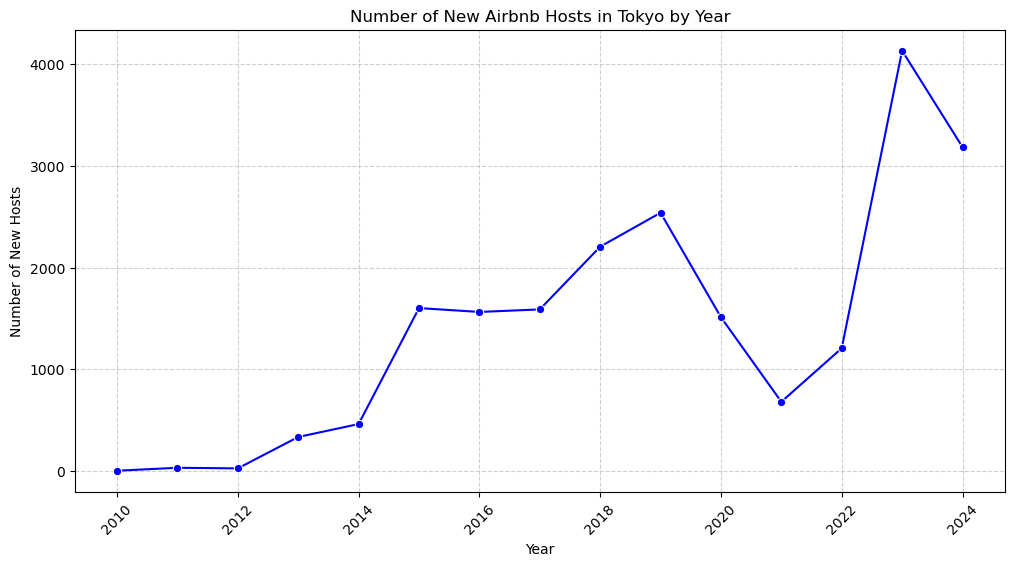

In [89]:
# Count the number of new hosts joining each year
df['host_since_year'] = df['host_since'].dt.year
hosts_per_year = df['host_since_year'].value_counts().sort_index()

# Plot the number of new hosts per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=hosts_per_year.index, y=hosts_per_year.values, marker='o', color='blue')

# Add labels and title
plt.title("Number of New Airbnb Hosts in Tokyo by Year")
plt.xlabel("Year")
plt.ylabel("Number of New Hosts")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### Insights
1. There was a gradual increase in new hosts joining Airbnb from 2010-2018. The growth aligns with the rising popularity of Airbnb in Japan and increasing global tourism.
2. he number of new hosts peaked around 2018-2019, likely in preparation for the Tokyo 2020 Olympics. Many property owners might have anticipated high demand and listed their homes on Airbnb.
3. There is a sharp decline in new hosts around 2020-2021, likely due to COVID-19 travel restrictions. With global travel nearly halted, fewer new hosts entered the market, and some may have left Airbnb.
4. Rebound in 2022-2024, it indicates that hosts returned to the market as tourism recovered.
Japan reopened its borders in late 2022, which may have encouraged new hosts to list properties again.

### Distribution of Listing Counts of Host

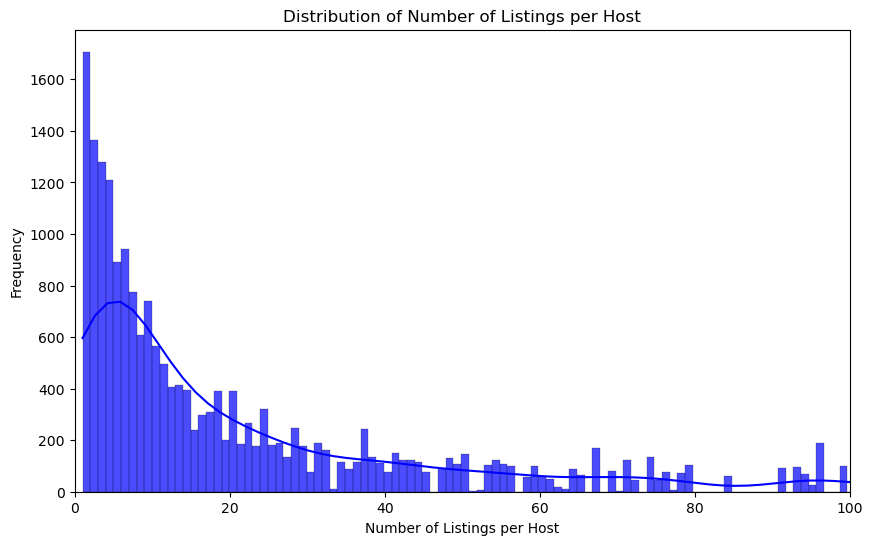

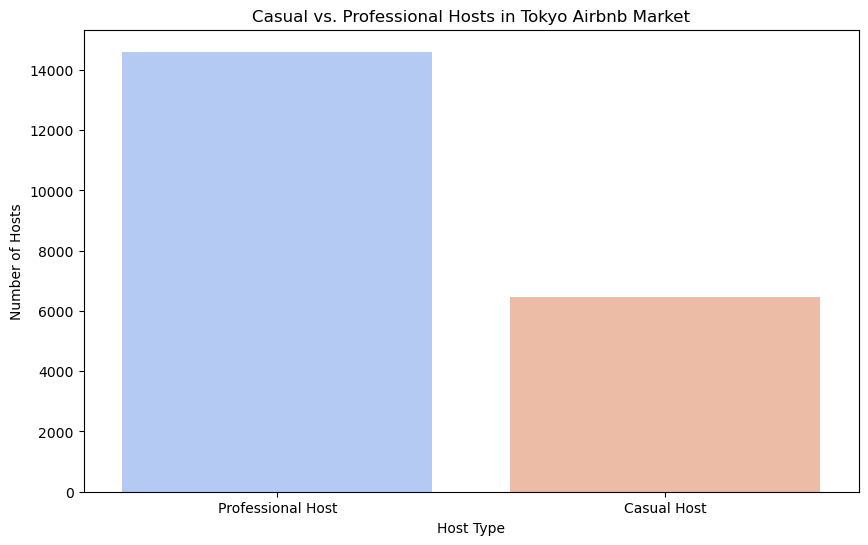

In [108]:
# Check the distribution of host_listings_count (number of listings per host)
plt.figure(figsize=(10, 6))
sns.histplot(df['host_listings_count'], 
            bins=323,
            kde=True,
            color="blue",
            alpha=0.7)
plt.title("Distribution of Number of Listings per Host")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Focus on reasonable range
plt.show()

# Categorize hosts into casual vs. professional
df['host_type'] = df['host_listings_count'].apply(lambda x: 'Casual Host' if x <= 5 else 'Professional Host')

# Count of casual vs. professional hosts
host_type_counts = df['host_type'].value_counts()

# Bar plot for host type distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=host_type_counts.index,
            y=host_type_counts.values,
            hue=host_type_counts.index,
            palette="coolwarm")
plt.title("Casual vs. Professional Hosts in Tokyo Airbnb Market")
plt.xlabel("Host Type")
plt.ylabel("Number of Hosts")
plt.show()

#### Insights
1. A larger proportion of Airbnb hosts in Tokyo manage multiple listings. This suggests that Airbnb in Tokyo is more commercialized, with business-oriented operators managing several properties.
2. Host with 5 or less listing (Casual Hosts) are a smaller group, likely renting out their personal apartments or spare rooms. They may face tougher competition from multi-listing operators with better pricing strategies and experience.

### Best and Worst-Rated Neighborhoods in Tokyo Airbnb

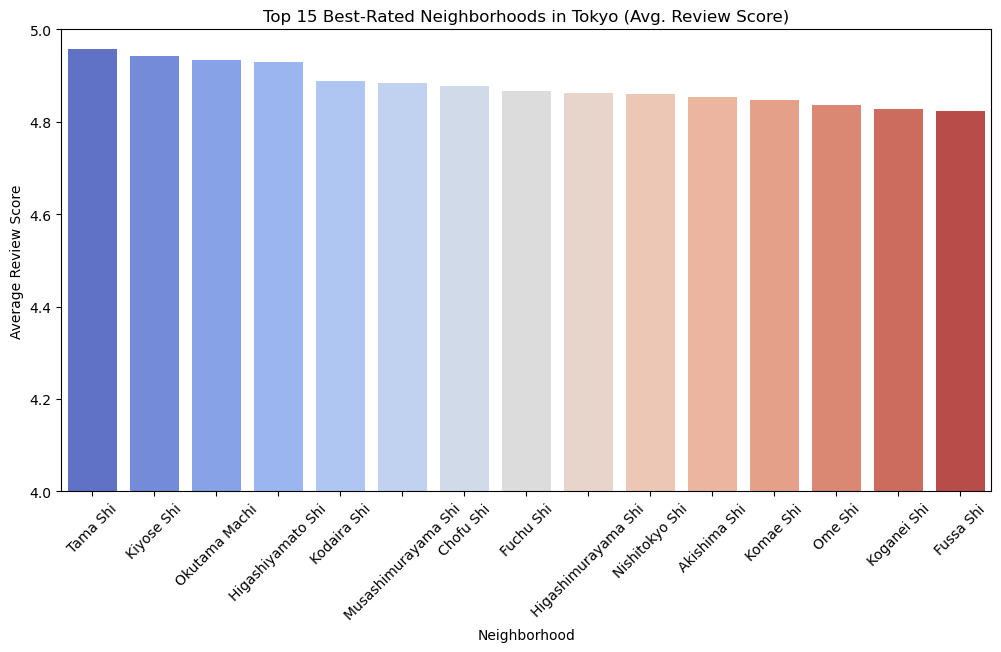

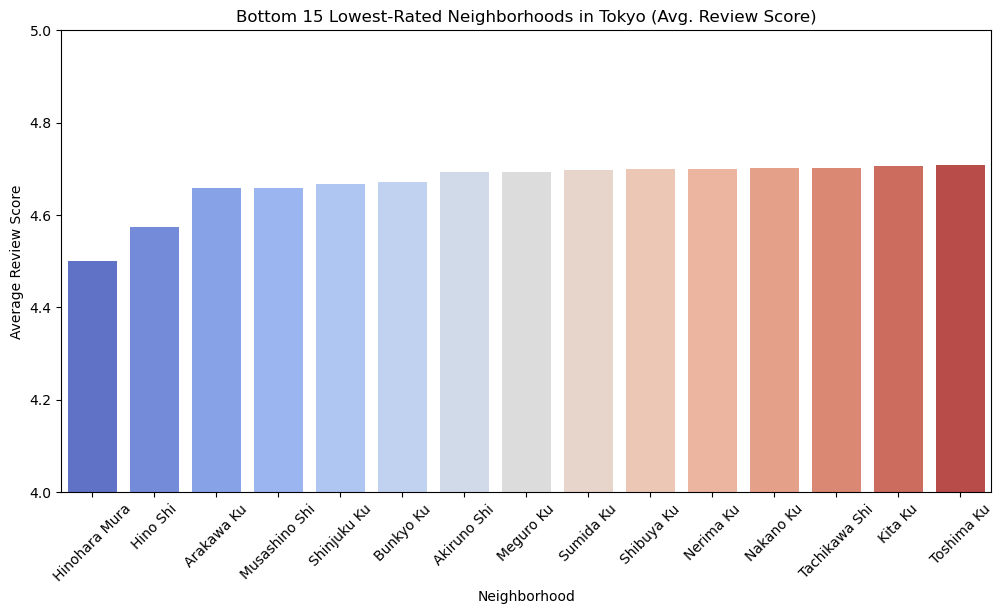

In [128]:
# Compute the average review score per neighborhood (Descending - Best Rated)
avg_review_scores_desc = df.groupby('neighbourhood')['review_scores_rating'].mean().sort_values(ascending=False)

# Plot a bar chart of top 15 best-rated neighborhoods
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_review_scores_desc.head(15).index, y=avg_review_scores_desc.head(15).values, hue=avg_review_scores_desc.head(15).index, palette="coolwarm")
plt.title("Top 15 Best-Rated Neighborhoods in Tokyo (Avg. Review Score)")
plt.xlabel("Neighborhood")
plt.ylabel("Average Review Score")
plt.xticks(rotation=45)
plt.ylim(4, 5)  # Focus on rating scale
plt.show()

# Compute the average review score per neighborhood (Ascending - Lowest Rated)
avg_review_scores_asc = df.groupby('neighbourhood')['review_scores_rating'].mean().sort_values(ascending=True)

# Plot a bar chart of bottom 15 lowest-rated neighborhoods
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_review_scores_asc.head(15).index, y=avg_review_scores_asc.head(15).values, hue=avg_review_scores_asc.head(15).index, palette="coolwarm")
plt.title("Bottom 15 Lowest-Rated Neighborhoods in Tokyo (Avg. Review Score)")
plt.xlabel("Neighborhood")
plt.ylabel("Average Review Score")
plt.xticks(rotation=45)
plt.ylim(4, 5)  # Focus on rating scale
plt.show()



#### Insights:
1. Highly-rated neighborhoods may be quieter, well-maintained, and offer better host responsiveness.
2. Tourist-heavy areas might receive slightly lower reviews due to noise, high turnover, and guest expectations.

## Conclusion: Tokyo Airbnb Data Analysis Insights

After an in-depth analysis of Tokyo Airbnb listings, we uncovered several key insights across hosts, pricing, availability, reviews, and market growth trends.



### Host Market Trends
1. Professional hosts dominate the Tokyo Airbnb market, with many managing multiple listings.
2. The number of new hosts peaked before the 2020 Olympics, followed by a decline due to COVID-19. Rebound in 2022-2024, it indicates that hosts returned to the market as tourism recovered.
3. Superhosts tend to price their listings higher. 

The Tokyo Airbnb market is commercialized, with experienced hosts running multiple listings, and Superhosts commanding premium pricing.

### Pricing & Revenue Insights
1. The price distribution is right-skewed, meaning most listings are affordable, but a few luxury listings push prices higher.
2. Certain neighborhoods command higher prices, particularly in central Tokyo districts.
3. Superhosts tend to charge more, but guests are willing to pay for the trust and quality associated with their status.

While Tokyo offers affordable Airbnb options, a luxury segment exists, and Superhosts leverage their status for premium pricing.

### Guest Experience & Review Factors
1. The review score distribution is left-skewed, meaning most listings receive high ratings (4.5 - 5.0).
2. Superhosts and highly responsive hosts tend to receive better ratings.
3. Some tourist-heavy neighborhoods receive slightly lower ratings, possibly due to noise, overcrowding, or high expectations.

Guests generally have positive experiences in Tokyo.



## Final thoughts and Next Steps

1. Deeper analysis of revenue trends – Which hosts are earning the most?
2. Impact of regulations on Airbnb availability – How have laws changed host behavior?
3. Forecasting Airbnb demand in Tokyo – Can we predict future listing trends?